---
---
Problem Set 9: Machine Learning I

Applied Data Science using Python

New York University, Abu Dhabi

Out: 09th Nov 2023 || **Due: 21st Nov 2023 at 23:59**

---
---
#Start Here
## Learning Goals
### General Goals
- Learn the fundamental concepts of Applied Machine Learning

### Specific Goals
- Learn how to create test and train splits
- Learn the basics of Scikit-Learn
- Learn to apply k-nearest neigbours (knn) classifier
- Learn to train a KNN classifier
- Learn to evaluate the performance of your classifier

## Collaboration Policy
- You are allowed to talk with / work with other students on homework assignments.
- You can share ideas but not code, analyses or results; you must submit your own code and results. All submitted code will be compared against all code submitted this and previous semesters and online using MOSS. We will also critically analyze the similarities in the submitted reports, methodologies, and results, **but we will not police you**. We expect you all to be mature and responsible enough to finish your work with full integrity.
- You are expected to comply with the [University Policy on Academic Integrity and Plagiarism](https://www.nyu.edu/about/policies-guidelines-compliance/policies-and-guidelines/academic-integrity-for-students-at-nyu.html). Violations may result in penalties, such as failure in a particular assignment.

## Late Submission Policy
You can submit the homework for upto 3 late days. However, we will deduct **20 points** from your homework grade **for each late day you take**. We will not accept the homework after 3 late days.

## Distribution of Class Materials
These problem sets and recitations are intellectual property of NYUAD, and we request the students to **not** distribute them or their solutions to other students who have not signed up for this class, and/or intend to sign up in the future. We also request you don't post these problem sets, and recitations online or on any public platforms.

## Disclaimer
The number of points do not necessarily signify/correlate to the difficulty level of the tasks.

## Submission
You will submit all your code as a Python Notebook through [Brightspace](https://brightspace.nyu.edu/) as **P9_YOUR NETID.ipynb**.

---




# General Instructions
This homework is worth 100 points. It has 4 parts. Below each part, we provide a set of concepts required to complete that part. All the parts need to be completed in this Jupyter (Colab) Notebook.



# Predicting Atherosclerosis

In this homework, you will be using your knowledge of machine learning so far to predict **atherosclerosis** (also known as the hardening of arteries) using a *atherosclerosis.csv* dataset provided with the handout. Diabetes, obesity, and hypertension are three of the major risk factors for atherosclerosis, and so you would see some correlates of these in the *features* for the dataset. The dataset contains the following *features*:

- *Pregnancies*: Number of times the subject was pregnant
- *Glucose*: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- *BloodPressure*: Diastolic blood pressure (mm Hg)
- *SkinThickness*: Triceps skin fold thickness (mm)
- *Insulin*: 2-Hour serum insulin (mu U/ml)
- *BMI*: Body mass index (weight in kg/(height in m)<sup>2</sup>)
- *AtherosclerosisPedigreeFunction*: Atherosclerosis pedigree function (a function which scores likelihood of atherosclerosis based on family history)
- *Age*: Age (years)
- *Outcome* : Class variable (0 if not diagnosed with the disease, 1 if diagnosed with the disease)

# Part I: Dataset Exploration (30 points)

In this part we would like you to explore the given data, and create appropriate visualizations wherever necessary.

More concretely, think about the following questions:

1. What are the descriptive statistics summarizing dataset's distribution, excluding NaN values if any.
2. Based on the above, can you see any anomalies in the data? Are there any missing values?
3. If there are any missing values, how would you impute them?
4. How does the distribution of the target variable look like?
5. Finally, are there any correlations?



## 1. Distribution of data (5 points)

Write code for loading, and computing the distribution of data.

In [56]:
############# SOLUTION ###############
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('atherosclerosis.csv')

# Compute descriptive statistics for the data, round to 2 decimal places
df.describe().round(2)
############ SOLUTION END #############

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,AtherosclerosisPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


## 2. Anomalies (10 points)

**Given your knowledge of the world, are there any obvious anomalies in the dataset after visual inspection?**

A glucose level of 0 is not realistically possible, and so is a blood pressure of 0. Similarly, a BMI of 0 is also mathematically impossible. These are some of the anomalies that you can find in the dataset.


## 3. Imputing Missing Values (5 points)

Write code for imputing missing values with estimated value based on other available information. What to impute the missing values with? Generally, if the variable in somewhat normally distributed, you could replace the missing values with the **mean**, however, if the distribution of the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the **median** may be a better representation of the majority of the values in the variable.

In [57]:
############# SOLUTION ###############
# Impute missing values
for column in df.columns:
    # Check if the column has missing values
    if df[column].isnull().sum() > 0:
        # Decide whether to use mean or median
        if df[column].skew() > 1 or df[column].skew() < -1:
            # Skewed distribution, use median
            df[column].fillna(df[column].median(), inplace=True)
        else:
            # Normal distribution, use mean
            df[column].fillna(df[column].mean(), inplace=True)

# Check if all missing values have been imputed
df

############ SOLUTION END #############

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,AtherosclerosisPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 4. Distribution of Target (5 points)

Write code to visualize the distribution of the target variable.

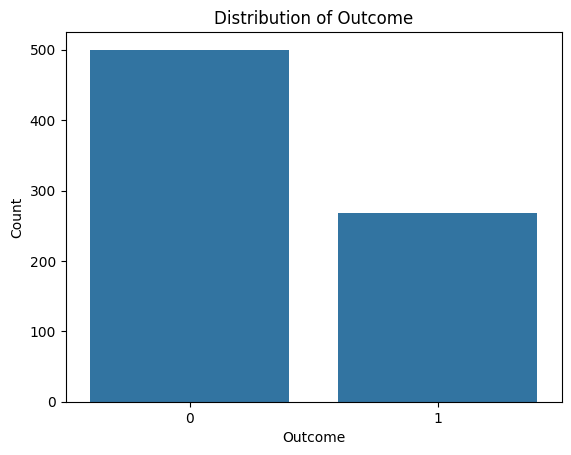

In [58]:
############# SOLUTION ###############
# Visualize the distribution of the target variable 'Outcome'
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

############ SOLUTION END #############

## 5. Compute and Plot Correlations (5 points)

Compute and plot correlation of each feature with the target variable.

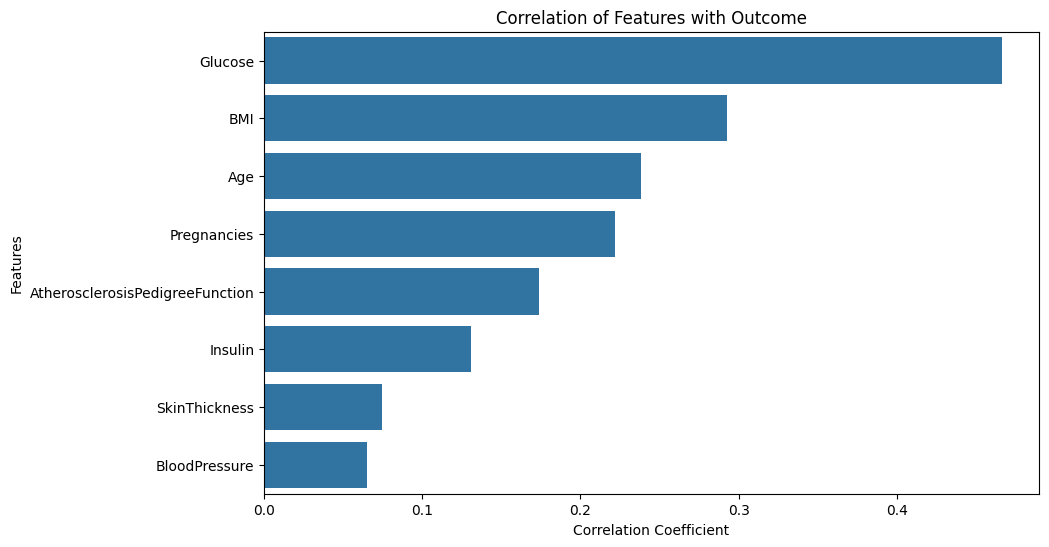

In [59]:
############# SOLUTION ###############
# Compute the correlations with the target variable
correlations = df.corr()['Outcome'].sort_values(ascending=False)

# Remove the correlation of Outcome with itself
correlations = correlations.drop('Outcome', axis=0)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlation of Features with Outcome')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

############ SOLUTION END #############

**Which 2 variables are the most highly correlated with the outcome/target variable?**

Glucose and BMI are the most highly correlated with the outcome/target variable.


## *Concepts and tools required to complete this task*

*   Critical Thinking
*   Pandas, numpy, seaborn, matplotlib





## Rubric

- +5 points for describing the distribution of data
- +10 points for detecting anomalies if any
- +3 points for proper imputation of the data
- +2 points for clearly presenting the steps for the imputation strategy
- +5 points for plotting the distribution of the target variable
- +5 points for computing and plotting correlations of variables with the target variable

# Part II: Data Preparation (20 points)

Now that you have explored the data, you would need to prepare the data for modeling. This is primarily a two-step process in this case: (i) data scaling/normalization, and (ii) train-test splitting

(i) For scaling your data, read this [article](https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7) before attempting this question to understand why KNN needs some sort of normalization or scaling.

(ii) For train-test split, make sure that the proportion of the classes remains the same across splits.

*Our reference solution uses a `random_state` value of `0` with the 75-25 split between train and test.*

In [60]:
# Write your code for data preparation below
train_X, test_X, train_y, test_y = None,None,None,None
############# SOLUTION ###############
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the features and the target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(
    X_scaled, y, test_size=0.25, random_state=0, stratify=y)

############# SOLUTION END ############

## *Concepts and tools required to complete this task*

*   Basics of machine learning
*   Classification
*   Supervised learning
*   K-nearest neighbours classification
*   Critical Thinking
*   Scikit-Learn
*   Optionally Scikit-Learn's `train_test_split()` function
*   Optionally Scikit-Learn's `StandardScaler()` function
*   Pandas, numpy, seaborn, matplotlib

## Rubric

- +10 points for a reasonable normalization strategy
- +10 points for the train-test split as per specifications

# Part III: Model Fitting and Tuning (40 points)

Now that you have created your train-test split, train your K-nearest neighbour model. Explain briefly the range and choice of your "k", and justify how you found it. It may help you to visualize the performance of your model as you change "k" on both train and test set.

Best value of k: 17 with test error: 0.22


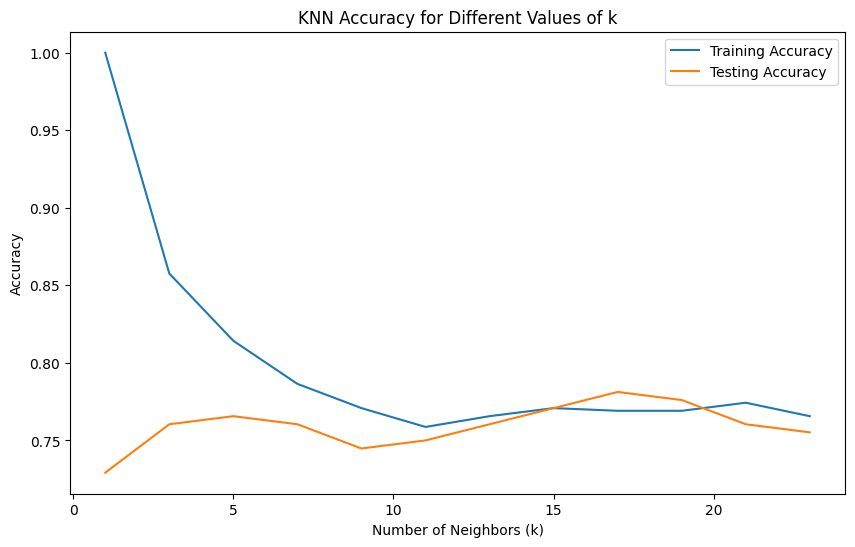

In [61]:
############# SOLUTION ###############
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lists to store the accuracy of KNN for different values of k
train_accuracy = []
test_accuracy = []
min_test_error = [np.inf, 1] # [min_error, k]

# Trying different values of k
# Trying all odd values of k from 1 to sqrt(number of training examples)
k_values = range(1, int(train_X.shape[0] ** 0.5) + 1, 2)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    
    # Predicting and calculating accuracy for train set
    train_y_pred = knn.predict(train_X)
    train_accuracy.append(accuracy_score(train_y, train_y_pred))
    
    # Predicting and calculating accuracy for test set
    y_test_pred = knn.predict(test_X)
    test_accuracy.append(accuracy_score(test_y, y_test_pred))
    
    test_error = 1 - accuracy_score(test_y, y_test_pred)
    # print('k: {}, test error: {:.2f}'.format(k, test_error))
    if test_error < min_test_error[0]:
        min_test_error = [test_error, k]
    
# Printing the best value of k
print('Best value of k: {} with test error: {:.2f}'.format(min_test_error[1], min_test_error[0]))
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.legend()
plt.show()

############# SOLUTION END ############

**Justify your choice of "k". What was the range of values you tried and why? How did you choose the optimal "k" value?**

The best value of k I found was 17. I tried odd values from 1 to $sqrt(n)$, where n is the number of samples in the training set since the k-NN algorithm prefers odd values for k. From my knowledge, checking values up till $sqrt(n)$ should provide us with a "good enough" value of k without too many comparisons, which might be expensive to perform on very large datasets. I chose the optimal value of k by plotting the accuracy of the model on the training and test sets as a function of k. The optimal value of k is the one that maximizes the accuracy on the test set, which in our case is 17.

[Your answer here in fewer than 5 sentences]


## *Concepts and tools required to complete this task*

*   Basics of machine learning
*   Classification
*   Supervised learning
*   K-nearest neighbours classification
*   Critical Thinking
*   Scikit-Learn



## Rubric

- +25 points for code and plot(s) describing a reasonable strategy to choose K
- +10 points for a reasonable choice of k and the justification
- +5 points for training the model

# Part IV: Model Evaluation (10 points)

Finally, we would like you to evaluate your model, not just on the *accuracy* metric, but also on other metrics of classification i.e. *precision*, *recall*, *F1*, and *AUC*.

Accuracy, while widely used, is generally *not* a good metric especially when the data is not balanced across the different classes. *Precision*, *Recall*, *F1*, and *Area Under the Curve (AUC)* are almost always considered better choices. You can find information about these different metrics on Scikit-Learn's website as well as in blogposts such as [here](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/) and [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5), and the video [here](https://www.youtube.com/watch?v=OAl6eAyP-yo). For computing the AUC ROC, look at the Scikit-Learn's documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).

## Performance Cut-offs
Your model should be no worse than the following cut-offs:

1. Accuracy (test set): 75%
2. AUC ROC: 0.79

In [62]:
#Write your code for computing Precision, Recall, F1, and ROC AUC below
############# SOLUTION ############
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming the best 'k' value was determined from the previous step
best_k = 17 # best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_X, train_y)

# Predicting on the test set
y_test_pred = knn.predict(test_X)

# Calculating various metrics
accuracy = accuracy_score(test_y, y_test_pred)
precision = precision_score(test_y, y_test_pred)
recall = recall_score(test_y, y_test_pred)
f1 = f1_score(test_y, y_test_pred)
auc_roc = roc_auc_score(test_y, knn.predict_proba(test_X)[:, 1])

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC ROC: {auc_roc:.2f}")

# Tests to ensure that the given performance metrics are met
assert accuracy >= 0.75, 'Accuracy is too low'
assert auc_roc >= 0.79, 'AUC ROC is too low'
########### SOLUTION END ##########

Accuracy: 0.78
Precision: 0.75
Recall: 0.57
F1 Score: 0.64
AUC ROC: 0.81


As we see, with our "optimal" k-value of 17, our model achieves the desired performance cut-offs.

## *Concepts and tools required to complete this task*

*   Basics of machine learning
*   Classification
*   Supervised learning
*   K-nearest neighbours classification
*   Critical Thinking
*   Scikit-Learn's `metrics` module
*   Understanding of different classification metrics


## Rubric

- +5 points for evaluating your model on the four metrics
- +5 points for meeting the performance cut-offs